In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

In [2]:
plt.rcParams['font.sans-serif']=['SimHei']  #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False  #用来正常显示负号

In [12]:
data = pd.read_csv('data.csv', index_col='Date')
data.index = [dt.datetime.strptime(x, '%Y-%m-%d') for x in data.index]

In [13]:
data.head()

,沪深300,中国平安
2015-06-23,0.03214,0.0496
2015-06-24,0.01965,0.0052
2015-06-25,-0.03557,-0.0287
2015-06-26,-0.07868,-0.0605
2015-06-29,-0.03336,-0.0119


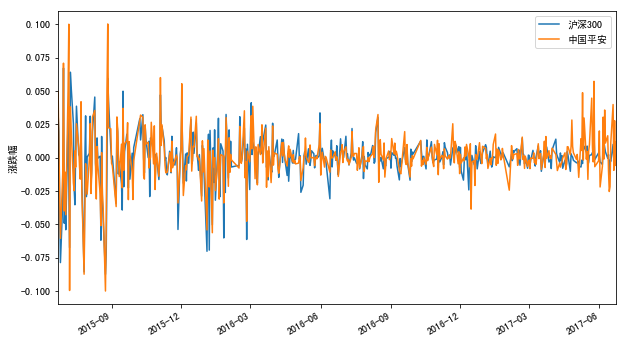

In [14]:
data.plot(figsize=(10, 6))
plt.ylabel('涨跌幅')

In [15]:
import statsmodels.api as sm

/opt/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [16]:
x = data['沪深300'].values
X = sm.add_constant(x)  #添加常数项
y = data['中国平安'].values

In [19]:
y

array([ 0.0496,  0.0052, -0.0287, -0.0605, -0.0119,  0.0708, -0.04  ,
       -0.0108, -0.0428,  0.0501,  0.1   , -0.0996,  0.038 ,  0.0223,
       -0.019 , -0.0248,  0.0051, -0.0071,  0.0254,  0.0078, -0.0067,
       -0.0161,  0.0419, -0.0236, -0.0874, -0.0399, -0.0046, -0.018 ,
       -0.0274, -0.0003,  0.0255, -0.0269, -0.012 ,  0.0304,  0.0354,
       -0.0063, -0.031 ,  0.0083, -0.0053, -0.0271, -0.051 ,  0.0038,
       -0.0274, -0.038 , -0.1   , -0.0507,  0.0498,  0.1002,  0.0224,
        0.0216, -0.0043, -0.006 , -0.0367,  0.0305,  0.0216,  0.0017,
       -0.0142,  0.0101, -0.0226,  0.037 , -0.0095,  0.0102,  0.0128,
        0.0262, -0.0315,  0.012 ,  0.0029, -0.0106, -0.0314, -0.0023,
        0.0281,  0.0319,  0.0303, -0.0135, -0.0161,  0.0246,  0.0102,
        0.0116, -0.0078, -0.0018,  0.0003,  0.0265, -0.0047,  0.0238,
       -0.0239, -0.0051,  0.0033, -0.014 ,  0.    ,  0.06  ,  0.0091,
        0.0246,  0.0072, -0.0055, -0.0113, -0.0114, -0.0107,  0.002 ,
        0.004 , -0.0